# Submission 3 Image Classifikation

**Classifikasi 4 Jenis Buah**

Cecep Roni

Dataset : https://www.kaggle.com/aelchimminut/fruits262/download

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x '/content/drive/My Drive/Colab Notebooks/Fruits.rar' '/content/drive/My Drive/Colab Notebooks/Fruits/'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Colab Notebooks/Fruits.rar

Creating    /content/drive/My Drive/Colab Notebooks/Fruits            OK
Creating    /content/drive/My Drive/Colab Notebooks/Fruits/apple      OK
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/0.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/1.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/10.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/100.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/1000.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/1001.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/Fruits/apple/1002.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Noteb

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2

In [4]:
fruits = os.path.join('/content/drive/My Drive/Colab Notebooks/Fruits/')
print(os.listdir(fruits))

['avocado', 'banana', 'coconut', 'apple']


In [5]:
ls_fruits = os.listdir(fruits)

print(ls_fruits)

['avocado', 'banana', 'coconut', 'apple']


In [6]:
from PIL import Image
total = 0

for x in ls_fruits:
  dir = os.path.join(fruits, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(5):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

avocado: 1169
- (219, 165)
- (297, 198)
- (226, 170)
- (233, 175)
- (174, 187)
---------------
banana: 1162
- (300, 300)
- (182, 180)
- (354, 193)
- (300, 300)
- (183, 206)
---------------
coconut: 1024
- (612, 408)
- (195, 260)
- (304, 180)
- (173, 260)
- (390, 260)
---------------
apple: 1203
- (309, 163)
- (272, 176)
- (215, 160)
- (226, 161)
- (255, 171)
---------------

Total : 4558


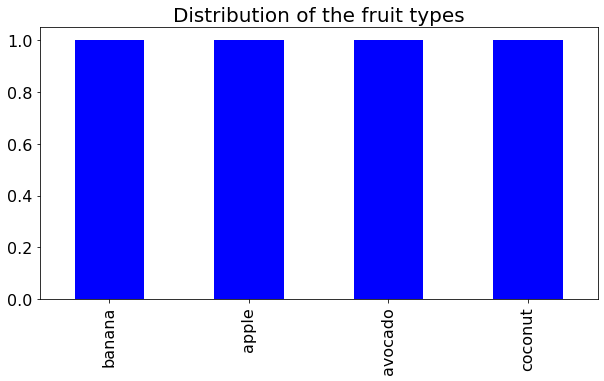

In [7]:
plt.figure(figsize=(10,5))
p = pd.value_counts(ls_fruits).plot(kind='bar',color='b')
plt.title("Distribution of the fruit types", fontsize = 20)
p.tick_params(labelsize=16)
plt.show()

<function matplotlib.pyplot.show>

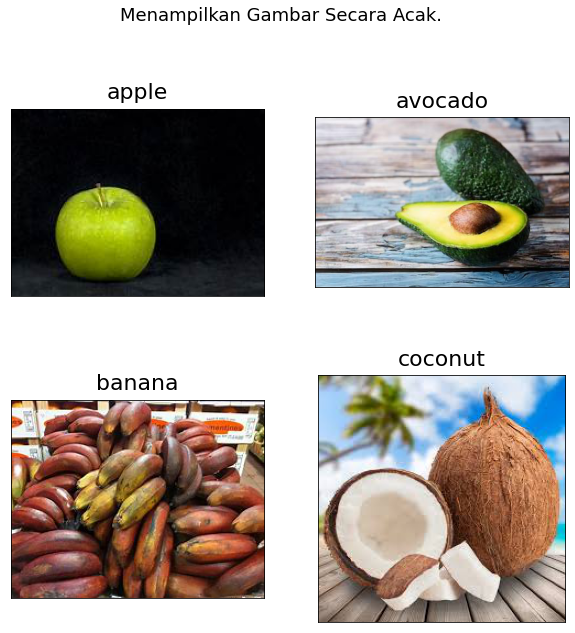

In [8]:
# tampilkan gambar

fig, axes = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle("Menampilkan Gambar Secara Acak.", fontsize=18)
sorted_fruits = sorted(ls_fruits)
fuits_id = 0
for i in range(2):
  for j in range(2):
    try:
      sel_fruits = sorted_fruits[fuits_id] 
      fuits_id += 1
    except:
      break
    if sel_fruits == '.TEMP':
        continue
    sel_fruits_images = os.listdir(os.path.join(fruits, sel_fruits))
    sel_fruits_random = np.random.choice(sel_fruits_images)
    img = plt.imread(os.path.join(fruits, sel_fruits, sel_fruits_random))
    axes[i][j].imshow(img)
    axes[i][j].set_title(sel_fruits, pad=10, fontsize=22)
    
plt.setp(axes, xticks=[],yticks=[])
plt.show

In [28]:
# Resize Gambar

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [30]:
batch_size = 200

trainset = datagen.flow_from_directory(
    fruits,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_set = datagen.flow_from_directory(
    fruits, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3649 images belonging to 4 classes.
Found 909 images belonging to 4 classes.


In [38]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 34, 34, 128)       36992     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 128)     

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nTingkat Akurasi Sudah 92%, training model selesai!")
      self.model.stop_training = True

callbacks = myCallback()

In [40]:
hist = model.fit(trainset, 
                    epochs = 100, 
                    steps_per_epoch = trainset.samples // batch_size,
                    validation_data = val_set, 
                    validation_steps = val_set.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/100
18/18 [==============================] - 32s 2s/step - loss: 1.1995 - accuracy: 0.4387 - val_loss: 1.5168 - val_accuracy: 0.3325
Epoch 2/100
18/18 [==============================] - 30s 2s/step - loss: 1.0096 - accuracy: 0.5865 - val_loss: 1.1537 - val_accuracy: 0.5625
Epoch 3/100
18/18 [==============================] - 30s 2s/step - loss: 0.8890 - accuracy: 0.6622 - val_loss: 1.0325 - val_accuracy: 0.6012
Epoch 4/100
18/18 [==============================] - 30s 2s/step - loss: 0.8231 - accuracy: 0.6918 - val_loss: 1.0243 - val_accuracy: 0.6162
Epoch 5/100
18/18 [==============================] - 30s 2s/step - loss: 0.8202 - accuracy: 0.6918 - val_loss: 0.9625 - val_accuracy: 0.6275
Epoch 6/100
18/18 [==============================] - 30s 2s/step - loss: 0.7945 - accuracy: 0.6990 - val_loss: 0.9160 - val_accuracy: 0.6325
Epoch 7/100
18/18 [==============================] - 30s 2s/step - loss: 0.7453 - accuracy: 0.7214 - val_loss: 0.9419 - val_accuracy: 0.6187
Epoch 8/100
1

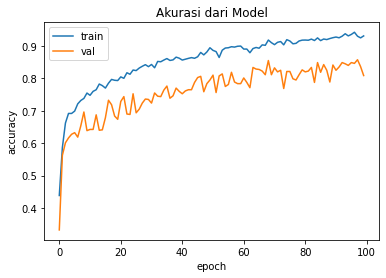

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Akurasi dari Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

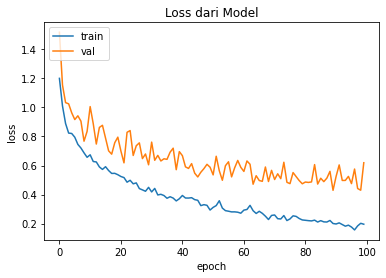

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss dari Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [43]:
Convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = Convert.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppfoswe6c/assets


In [44]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root 13337864 Jul 13 08:51 model.tflite
